In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('spam.csv')

In [3]:
data.head(3)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [4]:
data.tail(3)

,Category,Message
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [5]:
data.shape

(5572, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
data.isna()

,Category,Message
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [9]:
data.isna().sum()

Category    0
Message     0
dtype: int64

In [10]:
data.dtypes

Category    object
Message     object
dtype: object

In [11]:
data['Category'].unique()

array(['ham', 'spam'], dtype=object)

In [12]:
dict_a={'ham':0, 'spam':1}

In [13]:
data['Category']=data['Category'].map(dict_a)

In [14]:
dict_a

{'ham': 0, 'spam': 1}

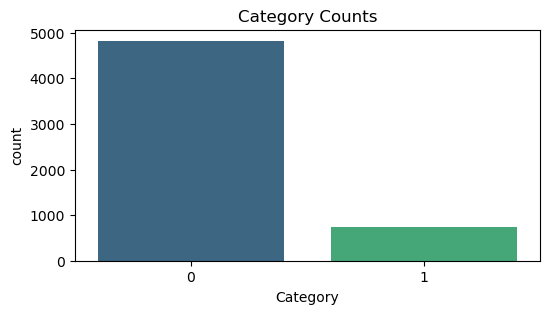

In [15]:
plt.figure(figsize=(6, 3))
plt.title('Category Counts')
sns.countplot(x=data['Category'], palette='viridis')
plt.show()

# Ml Model Building

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [17]:
X = data['Message']
y = data['Category']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [20]:
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)
predictions = classifier.predict(X_test_vectorized)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.9919282511210762
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       966
           1       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



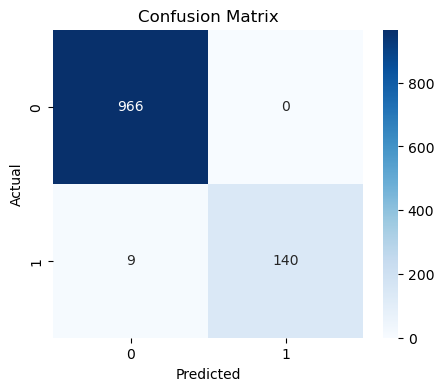

In [21]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, predictions)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [22]:
print("Classification Report:")
print(classification_report(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       966
           1       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



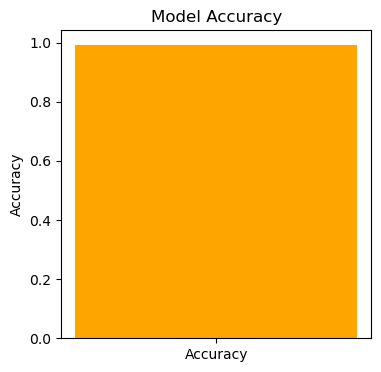

In [23]:
plt.figure(figsize=(4, 4))
plt.bar(['Accuracy'], [accuracy_score(y_test, predictions)], color=['orange'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()